---------------------------------------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

#Convert one-hot encoding to array
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

#sigmoid and its derivative
def sigmoid(x, deriv = False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

#Normalize array
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:
#read data from csv
iris = pd.read_csv("input/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


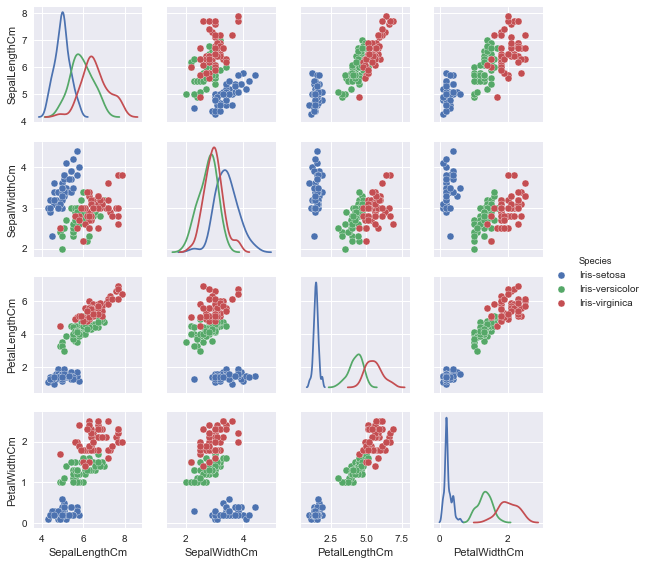

In [4]:
#Plot the various comp=binations of 2D graph
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=2, diag_kind="kde")

In [5]:
#Data cleanup
#Replace the species with 1,2 or 3 as appropriate
iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

#Get input
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris, columns=columns)
x = normalize(x.as_matrix())

#Get Output, flatten and encode to one-hot
columns = ['Species']
y = pd.DataFrame(iris, columns=columns)
y = y.as_matrix()
y = y.flatten()
y = to_one_hot(y)

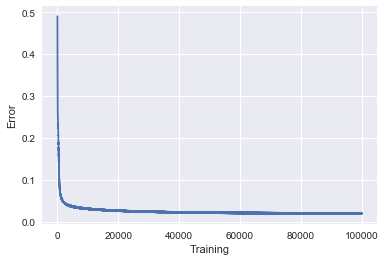

Training Accuracy 97.96%


In [8]:
#Split data to training and validation data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

#Weights
w0 = 2*np.random.random((4,4)) - 1 #for input
w1 = 2*np.random.random((4,3)) - 1 #for input and layer 1

#learning rate
n = 0.1

#Errors - for graph later
errors = []

#Train
for i in range(100000):

    #Feed forward
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    #Back propagation using gradient descent
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid(layer2, deriv=True)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid(layer1, deriv=True)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

#Plot the accuracy chart
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy " + str(round(accuracy,2)) + "%")

In [9]:
#Validate
layer0 = X_test
layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))

layer2_error = y_test - layer2

error = np.mean(np.abs(layer2_error))
accuracy = (1 - error) * 100

print("Validation Accuracy " + str(round(accuracy,2)) + "%")

Validation Accuracy 98.3%


In [10]:
layer2 = np.round(layer2, 0)
arr = np.zeros((len(layer2), 1))

for i in range(len(layer2)):
    l = layer2[i]
#     print(l)
    for j in range(len(l)):
        if(l[j] == 1):
            arr[i] = j+1

# arr